In [1]:
import numpy as np 
import pandas as pd 
from data.DC.processer import interpolate_flux_DC
interpolate_flux_DC(recompute=False)

ModuleNotFoundError: No module named 'functions'

In [48]:
new_leftmost = df[df['z_min'] == -1].copy()
new_rightmost = df[df['z_max'] == 1].copy()

new_leftmost['z_min'] = -1.1
new_leftmost['z_max'] = -1
new_rightmost['z_min'] = 1
new_rightmost['z_max'] = 1.1
df = pd.concat([new_leftmost,df,new_rightmost])
df

,GeV,m_flux,mbar_flux,e_flux,ebar_flux,z_min,z_max
NaN,0.10000,1.090320e+04,1.102220e+04,5.451350e+03,4.860350e+03,-1.1,-1.0
NaN,0.11220,9.775750e+03,9.856800e+03,4.877400e+03,4.316600e+03,-1.1,-1.0
NaN,0.12589,8.689800e+03,8.741450e+03,4.309850e+03,3.782650e+03,-1.1,-1.0
NaN,0.14125,7.646100e+03,7.674850e+03,3.760300e+03,3.270350e+03,-1.1,-1.0
NaN,0.15849,6.632700e+03,6.645150e+03,3.246600e+03,2.792400e+03,-1.1,-1.0
...,...,...,...,...,...,...,...
NaN,6309.60000,2.487400e-10,1.400700e-10,7.051900e-12,5.094500e-12,1.0,1.1
NaN,7079.50000,1.638600e-10,9.172100e-11,4.733100e-12,3.329500e-12,1.0,1.1
NaN,7943.30000,1.080200e-10,5.979800e-11,3.110800e-12,2.148800e-12,1.0,1.1
NaN,8912.50000,7.056700e-11,3.900500e-11,2.017700e-12,1.461200e-12,1.0,1.1


In [54]:
mflux = df[['GeV','z_min','z_max','m_flux']]
from scipy.interpolate import CloughTocher2DInterpolator as CT
points_avg = np.array([mflux['GeV'],(mflux['z_min'] + mflux['z_max'])/2]).T
phi = mflux['m_flux']
values=np.array(phi)

f_avg = CT(points_avg, values,rescale=True)

In [59]:
z = 0.95
print(f_max(1e2,z))
print(f_min(1e2,z))
print((f_min(1e2,z)+f_max(1e2,z))/2)
print(f_avg(1e2,z))

0.00025330167054987853
0.0002491233614874303
0.0002512125160186544
0.00024889


In [63]:
mflux.query('GeV == 100')

,GeV,z_min,z_max,m_flux
NaN,100.0,-1.1,-1.0,0.000243
NaN,100.0,-1.0,-0.9,0.000243
NaN,100.0,-0.9,-0.8,0.000254
NaN,100.0,-0.8,-0.7,0.000268
NaN,100.0,-0.7,-0.6,0.000283
NaN,100.0,-0.6,-0.5,0.000302
NaN,100.0,-0.5,-0.4,0.000324
NaN,100.0,-0.4,-0.3,0.000353
NaN,100.0,-0.3,-0.2,0.000393
NaN,100.0,-0.2,-0.1,0.000451


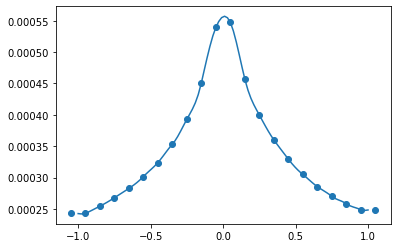

In [65]:
z = np.linspace(-1,1,100)
import matplotlib.pyplot as plt
temp = mflux.query('GeV == 100')
plt.plot(z, f_avg(1e2,z))
#plt.plot(z, (f_min(1e2,z)+f_max(1e2,z))/2)
plt.scatter((temp.z_min+temp.z_max)/2, temp.m_flux)